## Librerias necesarias para el proyecto

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from pandas import DataFrame
import pmdarima
import numpy as np
import scipy.stats as stats
import pylab 

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
from pylab import rcParams
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima
from pandas import read_csv
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels
import seaborn as sns 
import statsmodels.formula.api as smf           
import statsmodels.tsa.api as smt
import scipy.stats as scs
from itertools import product                
from tqdm import tqdm_notebook
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import scipy.stats as stats
import pylab 
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

## Creación de modelos AR Y MA 

In [55]:
#simular proceso de medias móviles de orden 1
def MA(numSamples,tetha, orden):
    """Función que selecciona el numero de datos dados para aplicar una media movil de orden n 
    NumSamples: Numero de observaciones a a las cuales se aplicara el modelo
    Tetha: Valor del Parametro 
    Orden: Orden del modelo """
    # Carga de la información
    WN = np.random.random(numSamples)
    MA = np.zeros(len(WN))
    MA[0] = 0
    for t in range(len(WN) - 1):
        MA[t] = tetha*MA[t-1] +  WN[t]
    return (MA)


#simular proceso autoregresivo de orden 1
def AR(numSamples, phi):
    """Función que selecciona el numero de datos dados para aplicar un modelo autoregersivo de orden n 
    NumSamples: Numero de observaciones a a las cuales se aplicara el modelo
    Tetha: Valor del Parametro 
    Orden: Orden del modelo """
    WN = np.random.randn(numSamples)
    AR = np.zeros(len(WN))
    AR[0] = 0
    for t in range(len(WN) - 1):
        AR[t] = phi*WN[t-1] +  WN[t]
    return (AR)

### Recolección de datos Sector Asegurador

In [56]:
#Rcoleccion de datos

cont_mes = 12
cont_dias = 31
cont_dias_2 = 30
cont_año = 2016
Datos_Mercado = {}
Datos_AYE = {}
Datos_GM = {}
for i in range(23):
    if cont_mes == 12:
        mes = '12'
    else:
        mes = f'0{cont_mes}'
    if cont_mes in [12,3]:
        Datos_Mercado[f'Datos_Mercado_{cont_año}_{mes}'] = pd.read_excel(f'estado_resultados_SIO_{cont_año}-{mes}-{cont_dias}_Total_Mercado de Seguros y Fianzas.xlsx')
        Datos_AYE[f'Datos_AYE_{cont_año}_{mes}'] = pd.read_excel(F'estado_resultados_SIO_{cont_año}-{mes}-{cont_dias}_Accidentes y Enfermedades_Mercado de Seguros y Fianzas.xlsx')
        Datos_GM[f'Datos_GM_{cont_año}_{mes}'] = pd.read_excel(f'estado_resultados_SIO_{cont_año}-{mes}-{cont_dias}_Gastos Médicos_Mercado de Seguros y Fianzas.xlsx')
    else:
        Datos_Mercado[f'Datos_Mercado_{cont_año}_{mes}'] = pd.read_excel(f'estado_resultados_SIO_{cont_año}-{mes}-{cont_dias_2}_Total_Mercado de Seguros y Fianzas.xlsx')
        Datos_AYE[f'Datos_AYE_{cont_año}_{mes}'] = pd.read_excel(F'estado_resultados_SIO_{cont_año}-{mes}-{cont_dias_2}_Accidentes y Enfermedades_Mercado de Seguros y Fianzas.xlsx')
        Datos_GM[f'Datos_GM_{cont_año}_{mes}'] = pd.read_excel(f'estado_resultados_SIO_{cont_año}-{mes}-{cont_dias_2}_Gastos Médicos_Mercado de Seguros y Fianzas.xlsx')
        
    if cont_mes == 12:
        cont_mes = 3
        cont_año = cont_año + 1
    else:
        cont_mes = cont_mes + 3   

In [57]:
lista = []
for i in Datos_Mercado.keys():
    lista.append(Datos_Mercado[i])
    
Datos_Mercado_Generales = pd.concat(lista)
Datos_Mercado_Generales.index = list(range(len(Datos_Mercado_Generales)))

lista2 = []
for i in Datos_AYE.keys():
    lista2.append(Datos_AYE[i])
    
Datos_AYE_Generales = pd.concat(lista2)
Datos_AYE_Generales.index = list(range(len(Datos_AYE_Generales)))

lista3 = []
for i in Datos_GM.keys():
    lista3.append(Datos_GM[i])
    
Datos_GM_Generales = pd.concat(lista3)
Datos_GM_Generales.index = list(range(len(Datos_GM_Generales)))

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


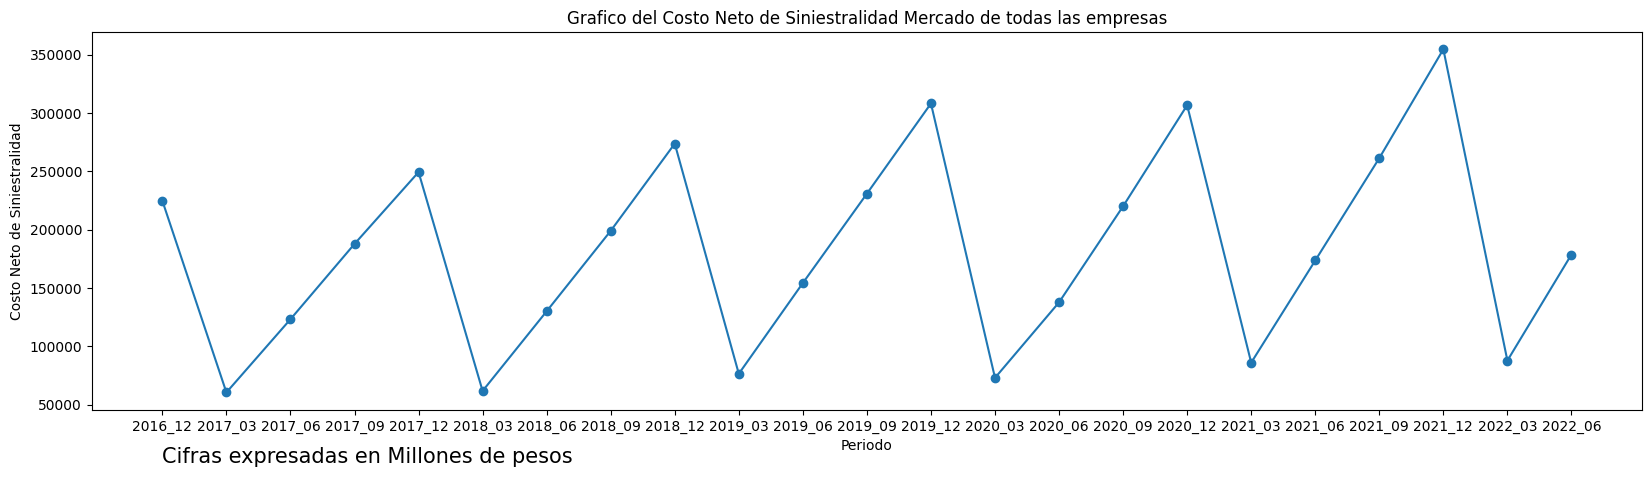

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


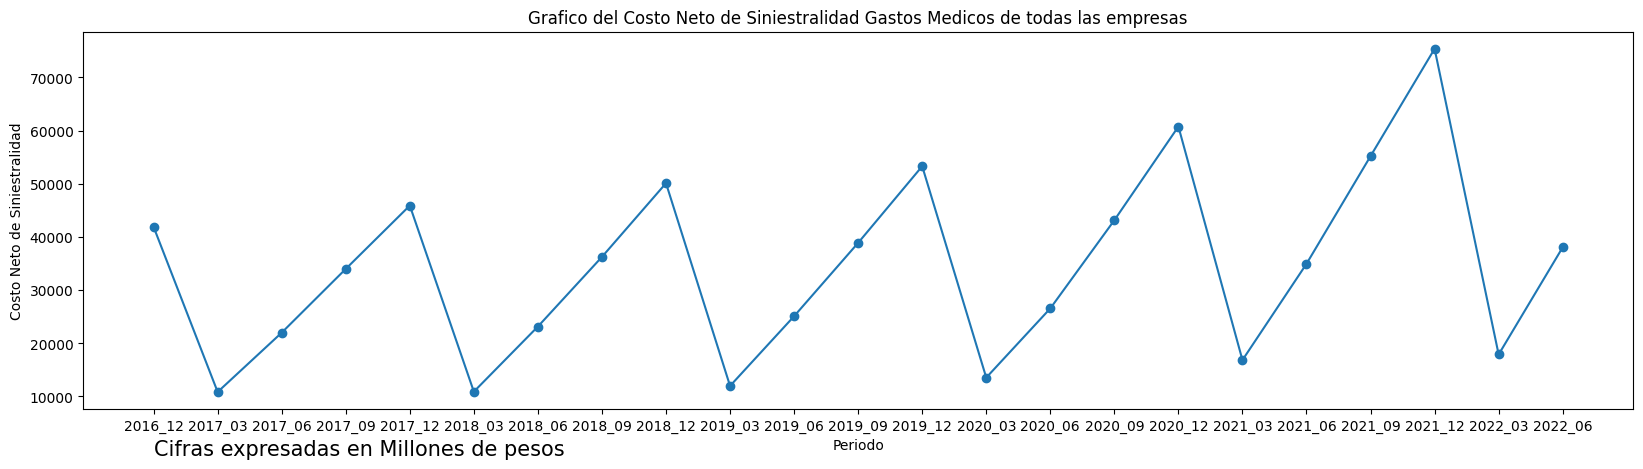

In [58]:

Fechas = ['2016_12','2017_03','2017_06','2017_09','2017_12','2018_03','2018_06','2018_09','2018_12','2019_03','2019_06',
          '2019_09','2019_12','2020_03','2020_06','2020_09','2020_12','2021_03','2021_06','2021_09','2021_12','2022_03',
          '2022_06']

Siniestralidad_Mercado_Generales = []
for i in Fechas:
    Siniestralidad_Mercado_Generales.append(sum(Datos_Mercado_Generales[Datos_Mercado_Generales['FECHA']== i]['COSTO NETO DE SINIESTRALIDAD'])/1000000)
plt_1 = plt.figure(figsize=(20, 5)) 
plt.text(0, 63, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.plot(Fechas,Siniestralidad_Mercado_Generales,'o-')
plt.xlabel('Periodo')
plt.ylabel('Costo Neto de Siniestralidad')
plt.title('Grafico del Costo Neto de Siniestralidad Mercado de todas las empresas');
plt.show()

Siniestralidad_GM_Generales = []
for i in Fechas:
    Siniestralidad_GM_Generales.append(sum(Datos_GM_Generales[Datos_GM_Generales['FECHA']== i]['COSTO NETO DE SINIESTRALIDAD'])/1000000)    
plt_1 = plt.figure(figsize=(20, 5)) 
plt.text(0, -1000, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.plot(Fechas,Siniestralidad_GM_Generales,'o-')
plt.xlabel('Periodo')
plt.ylabel('Costo Neto de Siniestralidad')
plt.title('Grafico del Costo Neto de Siniestralidad Gastos Medicos de todas las empresas');
plt.show()

### Calculo y prueba de  estacionalidad de la compañia objetivo PRIMAS

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


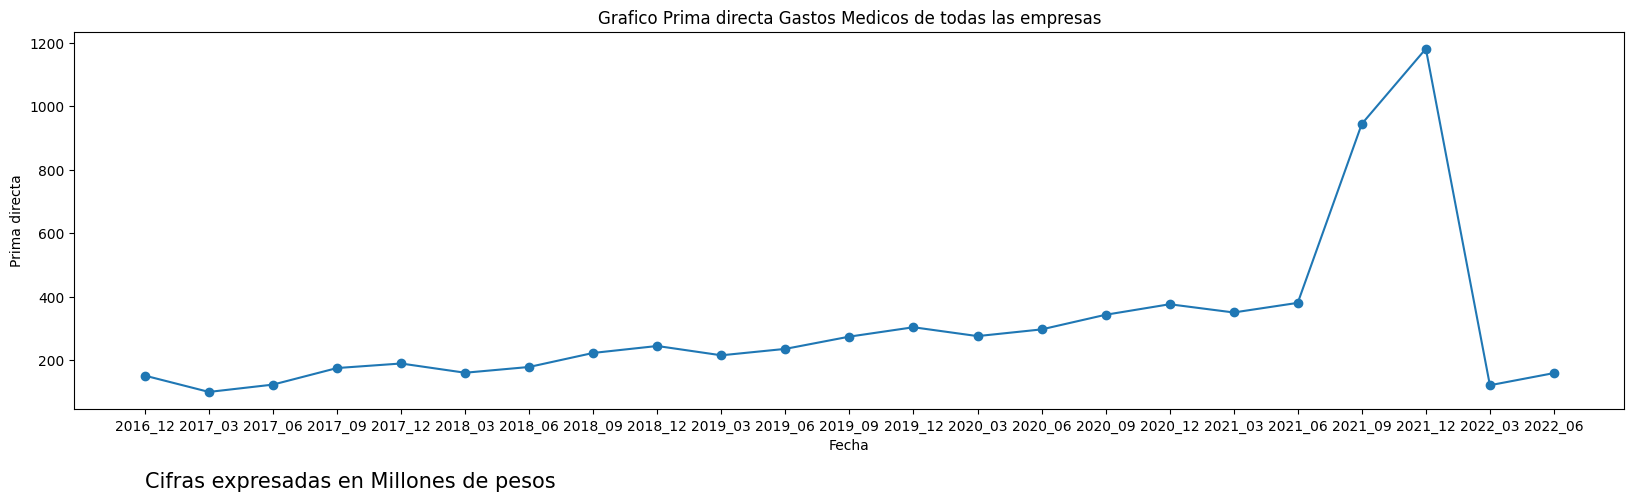

In [59]:
Datos_GM_BBVA = Datos_GM_Generales[(Datos_GM_Generales['INSTITUCIÓN']== 'BBVA Bancomer Seguros Salud')].copy()
Datos_GM_BBVA.index = list(range(len(Datos_GM_BBVA)))

plt_1 = plt.figure(figsize=(20, 5)) 
plt.text(0, -200, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.plot(Fechas, Datos_GM_BBVA['PRIMA DIRECTA']/1000000,'o-')
plt.xlabel('Fecha')
plt.ylabel('Prima directa')
plt.title('Grafico Prima directa Gastos Medicos de todas las empresas');
plt.show()

# Costos de sniestralidad de la compañia objetivo, prueba estacionaria

### Datos sin el uso de contratos inteligentes

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


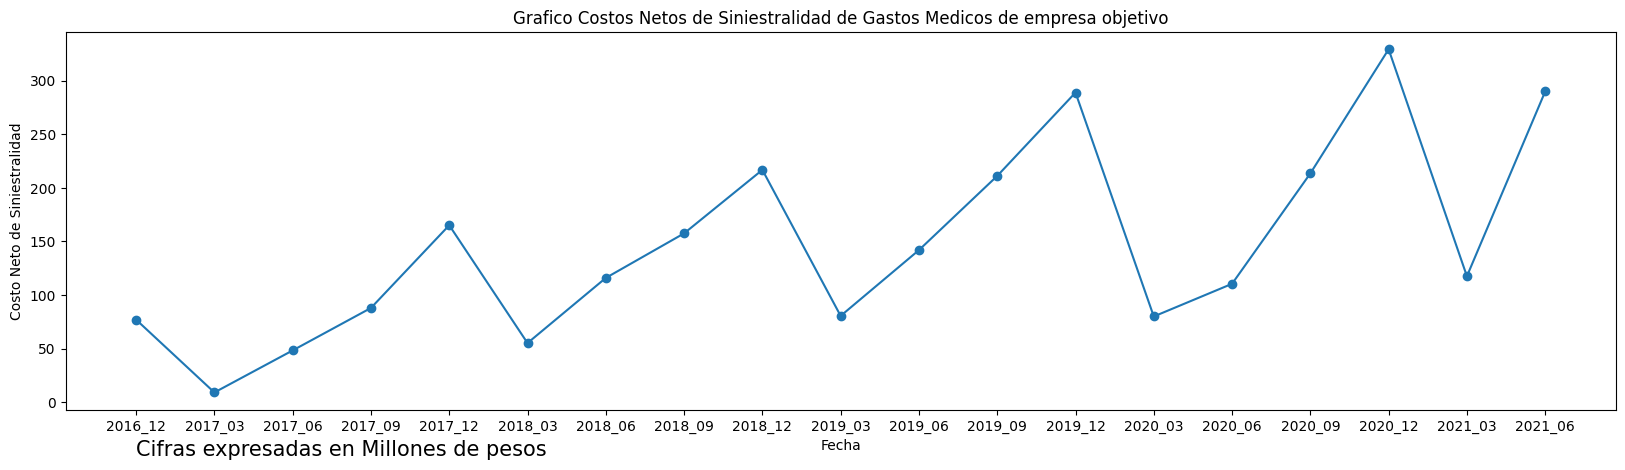

In [60]:
Datos_GM_BBVA_S = Datos_GM_Generales[(Datos_GM_Generales['INSTITUCIÓN']== 'BBVA Bancomer Seguros Salud')].copy()
Datos_GM_BBVA_S.index =  list(range(len(Datos_GM_BBVA)))
Datos_GM_BBVA_S = Datos_GM_BBVA_S.drop([19,20,21,22])


Fechas = ['2016_12','2017_03','2017_06','2017_09','2017_12','2018_03','2018_06','2018_09','2018_12','2019_03','2019_06',
          '2019_09','2019_12','2020_03','2020_06','2020_09','2020_12','2021_03','2021_06']
Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'] = Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD']/1000000

plt_1 = plt.figure(figsize=(20, 5)) 
plt.text(0, -50, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.plot(Fechas, Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'],'o-')
plt.xlabel('Fecha')
plt.ylabel('Costo Neto de Siniestralidad')
plt.title('Grafico Costos Netos de Siniestralidad de Gastos Medicos de empresa objetivo');
plt.show()

In [61]:
#Prueba AF para estacionaria

Datos_GM_BBVA_S['Datos 0 diff'] = Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD']

alpha_AF = 10 # solo es un valor para entrar al while
alpha = 0.05
Diferenciacion = 0 # factor d

while alpha_AF > alpha:
    print(f'Diferenciación {Diferenciacion}')
    Prueba_Afuller_GM_S = adfuller(Datos_GM_BBVA_S[f'Datos {Diferenciacion} diff'].dropna().values)
    print('Prueba Adfuller en el mercado')
    print('El valor ADF: ' + str(Prueba_Afuller_GM_S[0]))
    print('El valor P-value: ' + str(Prueba_Afuller_GM_S[1]))
    alpha_AF = Prueba_Afuller_GM_S[1]
    Diferenciacion = Diferenciacion + 1 
    Datos_GM_BBVA_S[f'Datos {Diferenciacion} diff'] = Datos_GM_BBVA_S[f'Datos {Diferenciacion -1 } diff'] - Datos_GM_BBVA_S[f'Datos {Diferenciacion -1 } diff'].shift(1)

Diferenciación 0
Prueba Adfuller en el mercado
El valor ADF: -4.194727387640649
El valor P-value: 0.0006725728930441625


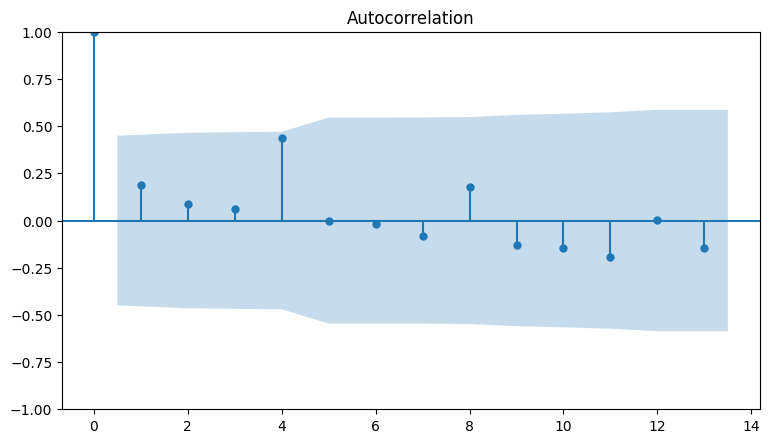

In [62]:
plot_acf(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], alpha= 0.05);
# Notamos la presencia de picos con autocorrelacion positiva cada tres lags nevativos

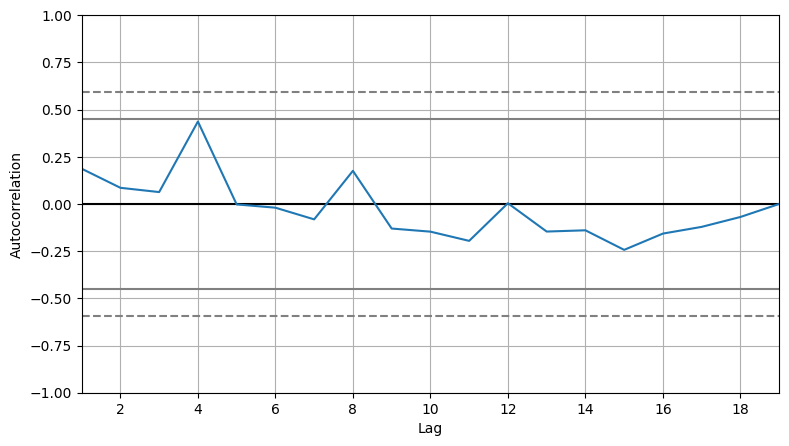

In [63]:
# Grafica de la autocorrelación uniendo puntos
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
autocorrelation_plot(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'].tolist());

In [64]:
# Una prueba estadistica 
pmdarima.arima.nsdiffs(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'],m=3)
# Esta prueba estadistica basada en una distribución chi cuadrada, devuelve 0 si es correcto una estacionalidad de cada 4 meses

2

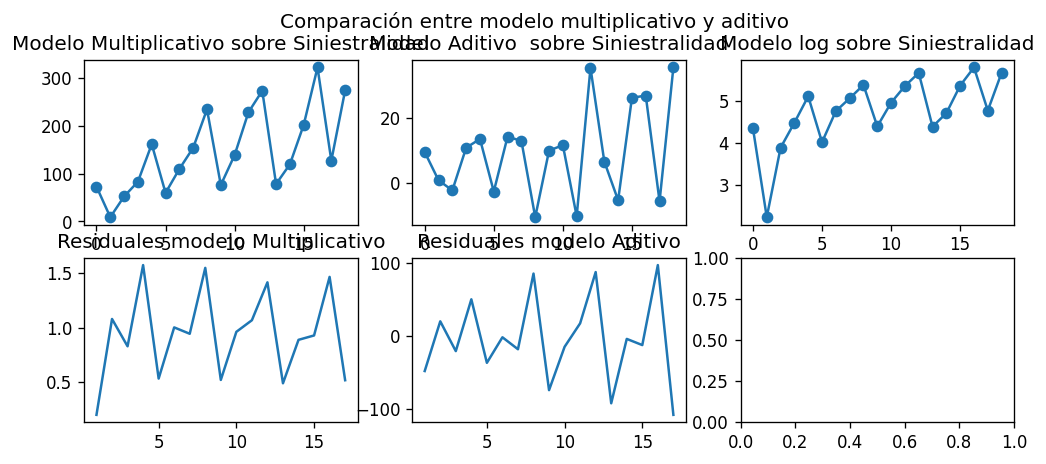

In [65]:
# Desestacionalidad multplicativa
fact_seasonal_M = seasonal_decompose(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], model='multiplicative', period= 3)
Datos_Desestacionalizados_M = Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'] / fact_seasonal_M.seasonal

# Desestacionalidad aditiva
fact_seasonal_A = seasonal_decompose(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], model='additive', period= 3)
Datos_Desestacionalizados_A = Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'] / fact_seasonal_A.seasonal

Datos_Desestacionalizados_log = np.log(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'])

fig, ax = plt.subplots(2, 3, figsize=(10,4), dpi=120)
fig.suptitle('Comparación entre modelo multiplicativo y aditivo')
ax[0,0].plot( Datos_Desestacionalizados_M,'o-')
ax[0,0].set_title('Modelo Multiplicativo sobre Siniestralidad')
ax[0,1].plot(Datos_Desestacionalizados_A, 'o-')
ax[0,1].set_title('Modelo Aditivo  sobre Siniestralidad');
ax[0,2].plot(Datos_Desestacionalizados_log,'o-')
ax[0,2].set_title('Modelo log sobre Siniestralidad')
ax[1,0].plot(fact_seasonal_M.resid)
ax[1,0].set_title('Residuales modelo Multiplicativo')
ax[1,1].plot(fact_seasonal_A.resid)
ax[1,1].set_title('Residuales modelo Aditivo');

#Podemos descartar el modelo multiplicativo por el comportamiento de los residuales, ya que tienen estacionalidad 
# Continuamos con los modelos aditivo y log

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


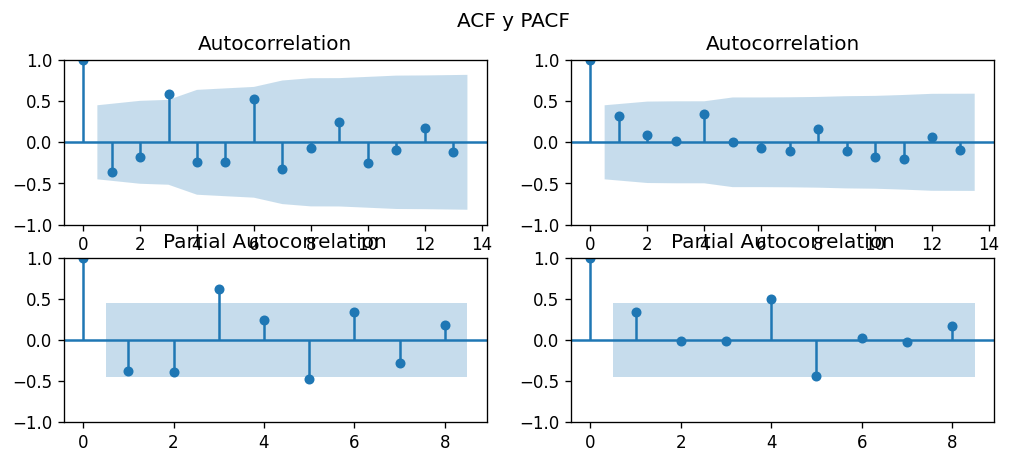

In [66]:
# Analizando el modelo con una desestacionalización aditiva
# el orden de los procesos es aditivo, multiplicativo y log

fig, ax = plt.subplots(2, 2,figsize=(10,4), dpi=120)
fig.suptitle('ACF y PACF')
plot_acf(Datos_Desestacionalizados_A, ax= ax[0,0]);
plot_pacf(Datos_Desestacionalizados_A, lags= 8, ax = ax[1,0]);
plot_acf(Datos_Desestacionalizados_log, ax= ax[0,1]);
plot_pacf(Datos_Desestacionalizados_log, lags= 8, ax = ax[1,1]);


In [67]:
# Realizando la prueba adfuller para ambos cojuntos de informacion "desestacionalizados"
Prueba_Afuller_GM_Des_A = adfuller(Datos_Desestacionalizados_A.dropna())
print('Prueba Adfuller con los datos aditivos')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_A[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_A[1]))

Prueba_Afuller_GM_Des_log = adfuller(Datos_Desestacionalizados_log.dropna())
print('Prueba Adfuller con los datos log')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_log[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_log[1]))

# en ninguno de los dos modelos, se concidera que la serie sea estacionaria, se continuara con una diferenciacion en ambos modelos

Prueba Adfuller con los datos aditivos
El valor ADF: -0.7739585294643087
El valor P-value: 0.826652138527026
Prueba Adfuller con los datos log
El valor ADF: 0.9375595034779282
El valor P-value: 0.9935614235376417


Prueba Adfuller diferenciados con los datos aditivos
El valor ADF: -2.236145082859545
El valor P-value: 0.1933893135732624
Prueba Adfuller diferenciados con los datos log
El valor ADF: -2.8887881301009832
El valor P-value: 0.04666740615908643


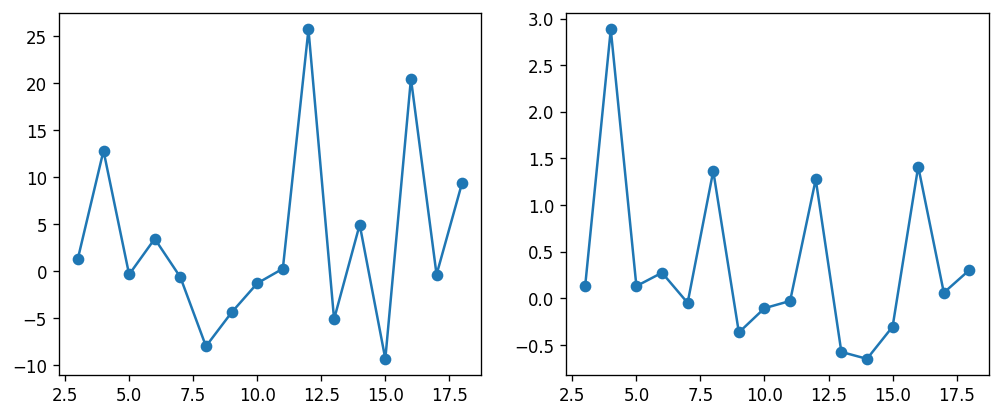

In [68]:
#Diferenciacion al grado de la estacionalidad m =3 

Datos_Desestacionalizados_A_dif1 = pd.DataFrame(Datos_Desestacionalizados_A).diff(3)
Prueba_Afuller_GM_Des_A = adfuller(Datos_Desestacionalizados_A_dif1.dropna())
print('Prueba Adfuller diferenciados con los datos aditivos')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_A[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_A[1]))

Datos_Desestacionalizados_log_dif1 = pd.DataFrame(Datos_Desestacionalizados_log).diff(3)
Prueba_Afuller_GM_Des_log = adfuller(Datos_Desestacionalizados_log_dif1.dropna())
print('Prueba Adfuller diferenciados con los datos log')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_log[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_log[1]))

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,4), dpi=120)
ax1.plot(Datos_Desestacionalizados_A_dif1.dropna(),'o-');
ax2.plot(Datos_Desestacionalizados_log_dif1.dropna(),'o-');

# Solo los datos de modelo adivito cumplen con la estacionaridad a una diferenciación
# es necesario hacer una segunda diferenciación para los datos log

Prueba Adfuller diferenciados con los datos aditivos
El valor ADF: -3.21529605900728
El valor P-value: 0.019116181219360255
Prueba Adfuller diferenciados con los datos log
El valor ADF: -2.930823451151683
El valor P-value: 0.04187927091403139


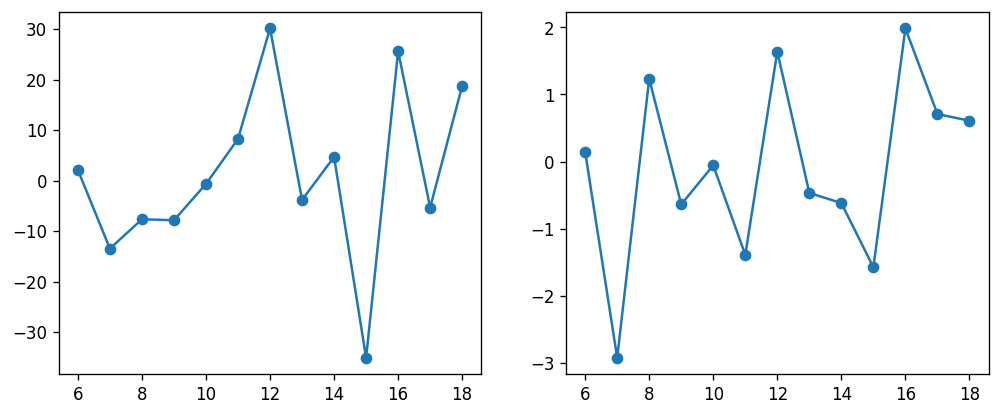

In [69]:
Datos_Desestacionalizados_A_dif2 = pd.DataFrame(Datos_Desestacionalizados_A_dif1).diff(3)
Prueba_Afuller_GM_Des_A = adfuller(Datos_Desestacionalizados_A_dif2.dropna())
print('Prueba Adfuller diferenciados con los datos aditivos')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_A[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_A[1]))

Datos_Desestacionalizados_log_dif2 = pd.DataFrame(Datos_Desestacionalizados_log_dif1).diff(3)
Prueba_Afuller_GM_Des_log = adfuller(Datos_Desestacionalizados_log_dif2.dropna())
print('Prueba Adfuller diferenciados con los datos log')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_log[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_log[1]))

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,4), dpi=120)
ax1.plot(Datos_Desestacionalizados_A_dif2.dropna(),'o-');
ax2.plot(Datos_Desestacionalizados_log_dif2.dropna(),'o-');

#Ya que a una segunda diferenciación se comportan de manera estacional, aun cumpliendo la prueba fuller, rechazamos este modelo
# y tomamos el modelo aditivo que tiene unj nivel de p-value menor

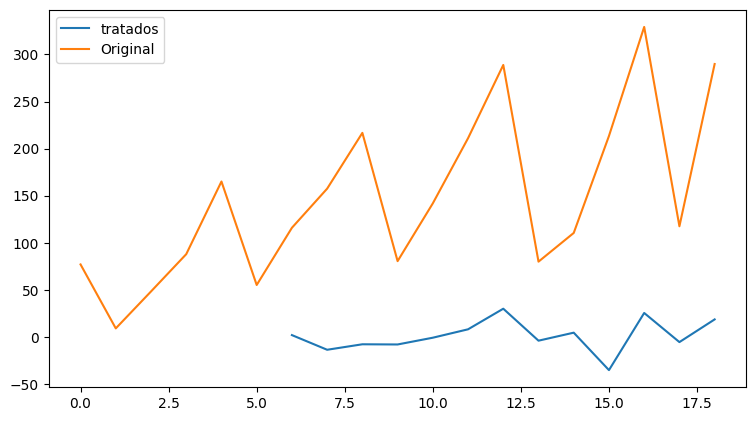

In [70]:
# Solo analizaremos como se ven nuestra graficas destacionalizada y diferenciada con forme a los datos originales
plt.plot(Datos_Desestacionalizados_A_dif2, label= 'tratados');
plt.plot(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], label= 'Original')
plt.legend()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


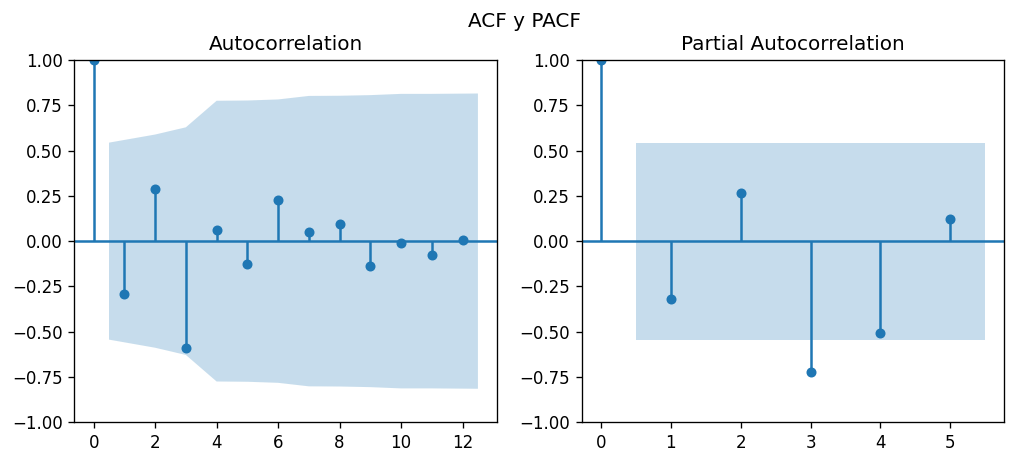

In [71]:
# Observando acf y pacf de la primera difernacion de datos aditivos 
# datos Datos_Desestacionalizados_A_dif1

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,4), dpi=120)
fig.suptitle('ACF y PACF')
plot_acf(Datos_Desestacionalizados_A_dif2.dropna(), ax= ax1);
plot_pacf(Datos_Desestacionalizados_A_dif2.dropna(), lags= 5, ax = ax2);

#Observamos que dentro de las graficas nos dan los parametros p y q 
# tal que q = 0 p = 2

In [72]:
from statsmodels.tsa.arima.model import ARIMA
modelo_arima = ARIMA(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], order=(1,1,0))
modelo_arima_ajustado = modelo_arima.fit()
modelo_arima_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     COSTO NETO DE SINIESTRALIDAD   No. Observations:                   19
Model:                           ARIMA(1, 1, 0)   Log Likelihood                -108.096
Date:                          Sun, 20 Nov 2022   AIC                            220.192
Time:                                  22:11:55   BIC                            221.973
Sample:                                       0   HQIC                           220.438
                                           - 19                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4439      0.254     -1.749      0.080      -0.941       0.054
sigma2      9518.7218   4922.980      1.934      0.053    -130.142    1.92e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.37   Prob(JB):                         0.51
Heteroskedasticity (H):               4.84   Skew:                            -0.50
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


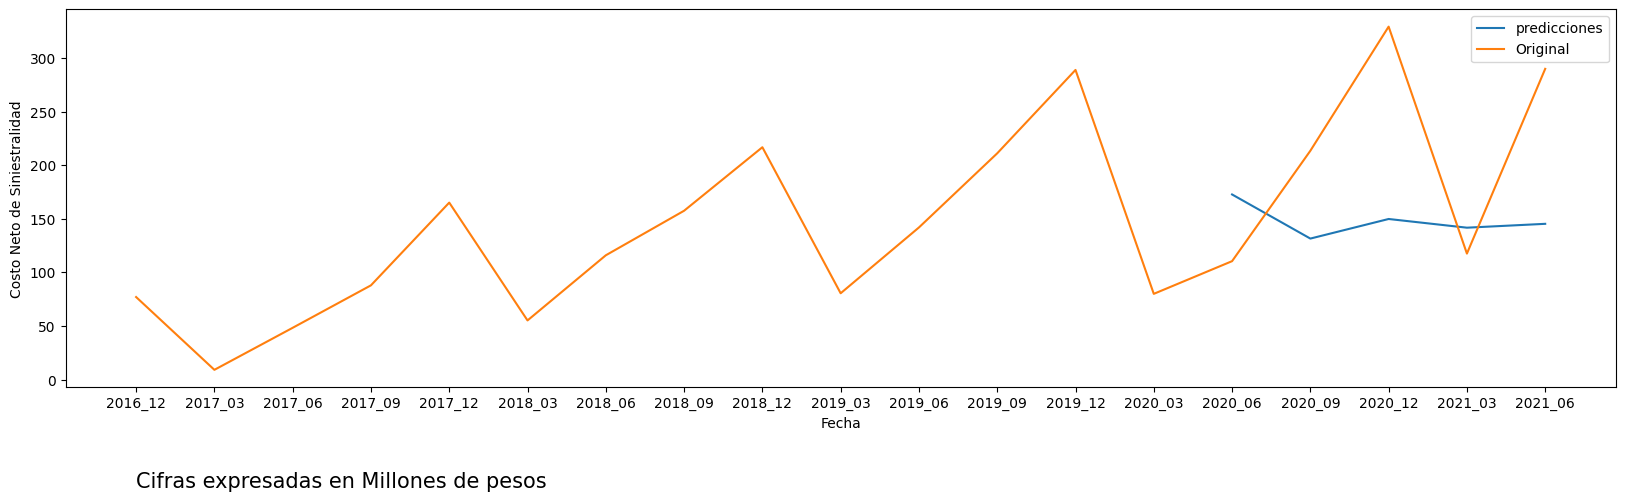

((array([-1.80134827, -1.36019854, -1.08697871, -0.87729702, -0.70051708,
         -0.54335769, -0.39863433, -0.26184392, -0.12980477,  0.        ,
          0.12980477,  0.26184392,  0.39863433,  0.54335769,  0.70051708,
          0.87729702,  1.08697871,  1.36019854,  1.80134827]),
  array([-174.24673124, -160.21349722, -109.85750234,  -75.60750178,
          -67.45905033,  -62.1912293 ,    0.91934248,    9.05788733,
           11.96354766,   56.98145851,   68.48276572,   77.1       ,
           77.64459091,   78.31257295,   94.69345182,   96.36241398,
          108.41584806,  116.44521033,  161.40476034])),
 (99.96567735212797, 16.221491466963236, 0.9656100993637152))

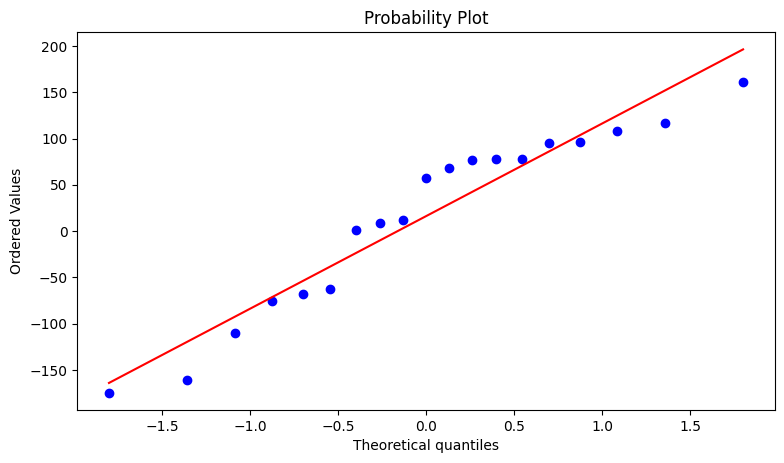

In [73]:
# la parte del proceso arima se ve bastante bien por los p value arrojados por los paramentros utilizados
# observacion grafica del modelo arima como predictor
plt_1 = plt.figure(figsize=(20, 5))
predicciones_arima =modelo_arima_ajustado.predict(start=14,end=18,dynamic=True)
plt.plot(predicciones_arima, label= 'predicciones');
plt.plot(Fechas,Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], label= 'Original')
plt.legend()
plt.text(0, -100, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.xlabel('Fecha')
plt.ylabel('Costo Neto de Siniestralidad')
plt.show()

#Analisis de residuales por grafica qqplot
stats.probplot(modelo_arima_ajustado.resid, dist="norm", plot=pylab)

# Se observa que las prediciones son muy eficientes,sin embargo, solo se cuenta con el factor estacioanrio arima

In [74]:
# Analizando un modelo SARIMAX
lista_resultados = []
for P in [0,1,2,4]:
    for Q in [0,1,2,4]:
        try:
            modelo = SARIMAX(Datos_Desestacionalizados_A_dif1.dropna(), order=(4,1,0),seasonal_order=(P,1,Q,3),).fit(disp=-1)
        except:
            continue
        print()
        lista_resultados.append([(P,Q),modelo.aic])
Resultados_AIC = pd.DataFrame(lista_resultados)
Resultados_AIC.columns = ['Factores (P,Q)', 'AIC']
Resultados_AIC[Resultados_AIC['AIC'] == min(Resultados_AIC['AIC'])]

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"Factores (P,Q)",AIC
1,"(0, 1)",108.57112


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


((array([-1.80134827, -1.36019854, -1.08697871, -0.87729702, -0.70051708,
         -0.54335769, -0.39863433, -0.26184392, -0.12980477,  0.        ,
          0.12980477,  0.26184392,  0.39863433,  0.54335769,  0.70051708,
          0.87729702,  1.08697871,  1.36019854,  1.80134827]),
  array([-78.87490352, -73.44626913, -67.01451241, -66.40935309,
         -54.67232555, -50.44694321, -36.50362846, -10.0514128 ,
          -4.63080956,  -2.78361234,   1.93980463,  24.22908953,
          31.35710949,  35.84168406,  37.25119688,  58.19269401,
          77.1       , 106.50342639, 142.00247845])),
 (65.42273665830247, 3.6623007023307297, 0.9775846441294352))

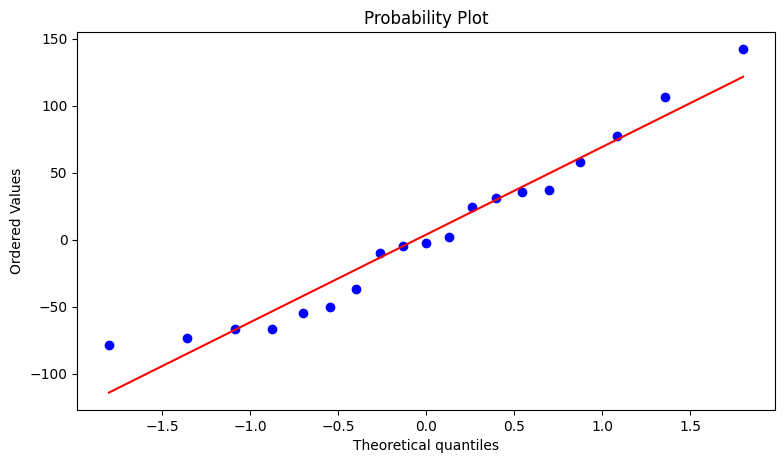

In [75]:
modelo_sarimax= sm.tsa.statespace.SARIMAX(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'],order=(4,1,0),seasonal_order=(0,1,1,3))
modelo_sarimax_ajustado=modelo_sarimax.fit()
stats.probplot(modelo_sarimax_ajustado.resid.dropna(), dist="norm", plot=pylab)

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


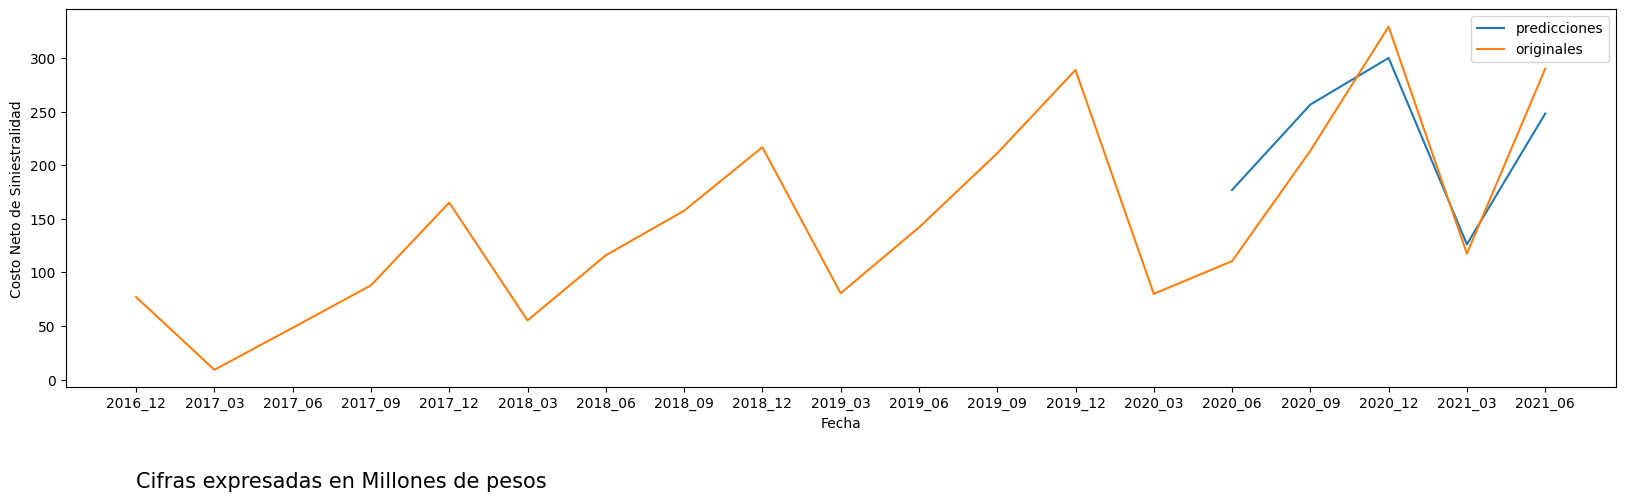

In [76]:
predicciones_sarimax =modelo_sarimax_ajustado.predict(start=14,end=18,dynamic=True)
plt_1 = plt.figure(figsize=(20, 5))
plt.plot(predicciones_sarimax, label= 'predicciones');
plt.plot(Fechas,Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'], label= 'originales');
plt.legend();

plt.text(0, -100, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.xlabel('Fecha')
plt.ylabel('Costo Neto de Siniestralidad');
#Observamos que el modelo se ajusta mejor para los datos, sin embargo seria buena opcion buscar alguna alternativa en loop
# para encontrar un mdelo que no solo de el AIC mas bajo, tambien el MSE

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


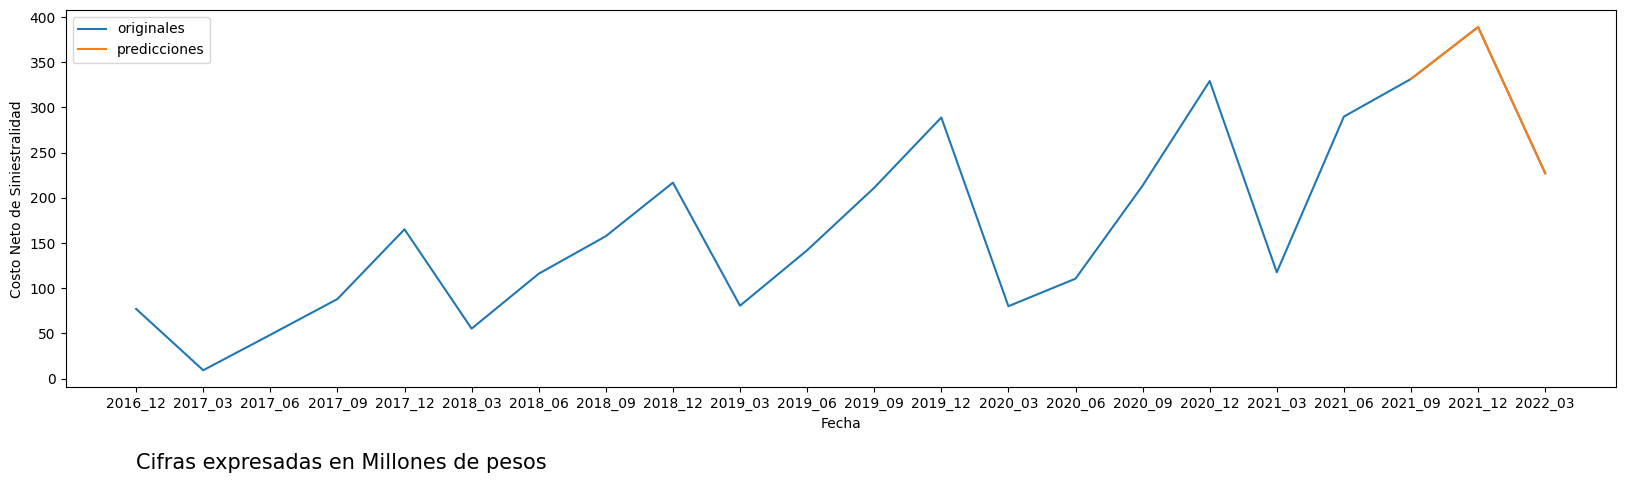

In [77]:
# ya que el volumen de datos es escaso, no podemos pronosticar mas alla de 1 año
# pronostico a un año 
# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
Datos_Adicionales_Prediccion = pd.DataFrame()
Datos_Adicionales_Prediccion['Fechas'] = Fechas + ['2021_09','2021_12','2022_03']
Datos_Adicionales_Prediccion['COSTO NETO DE SINIESTRALIDAD'] = (list(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD']) + ['NaN', 'NaN','NaN'])

predicciones_sarimax2 =modelo_sarimax_ajustado.predict(start=19,end=21,dynamic=True)
plt_1 = plt.figure(figsize=(20, 5))
plt.plot(Datos_Adicionales_Prediccion['Fechas'],list(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'].values) + list(predicciones_sarimax2.values), label= 'originales');
plt.plot(predicciones_sarimax2, label= 'predicciones');
plt.legend();

plt.text(0, -100, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.xlabel('Fecha')
plt.ylabel('Costo Neto de Siniestralidad');
#Observamos que el modelo se ajusta mejor para los datos, sin embargo seria buena opcion buscar alguna alternativa en loop
# para encontrar un mdelo que no solo de el AIC mas bajo, tambien el MSE

In [78]:
Datos_Contratos_inteligentes = pd.read_excel('Datos_GMI.xlsx', sheet_name= 'Cartera_Contratos_Inteligentes')
Datos_Contratos_inteligentes

,Fecha,# Polizas,Prima Emitida contratos inteligentes,Prima Cedida,# Reclamaciones,Mes,Costo Siniestralidad contratos inteligentes,Monto Recuperado de Reaseguro,Costo Siniestralidad general,Prima emitida general,# Polizas general
0,2021_07,329,10611770.02,32007.52,51,7,648606.97,11833.60,882406.97,14913801.68,3866
1,2021_08,3379,27028401.58,5296055.90,597,8,2476876.25,649568.25,3806876.25,32289271.08,7577
2,2021_09,4930,50924334.33,8135833.39,454,9,3681593.81,609741.01,4438859.98,67986173.69,8442
3,2021_10,5433,39494172.05,10398349.14,334,10,1626470.92,357882.59,1665471.22,44293757.24,8488
4,2021_11,5776,44400599.68,11986014.59,202,11,1215214.01,329967.17,1438583.32,54366886.20,9642
5,2021_12,5742,43880749.99,12274405.87,35,12,170085.93,85042.96,350085.93,49626951.65,9631


In [79]:
Datos_GM_BBVA_2 = Datos_GM_Generales[(Datos_GM_Generales['INSTITUCIÓN']== 'BBVA Bancomer Seguros Salud')].copy()
Datos_GM_BBVA_2.index =  list(range(len(Datos_GM_BBVA)))
Datos_GM_BBVA_2['COSTO NETO DE SINIESTRALIDAD'] = Datos_GM_BBVA_2['COSTO NETO DE SINIESTRALIDAD']/1000000 

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


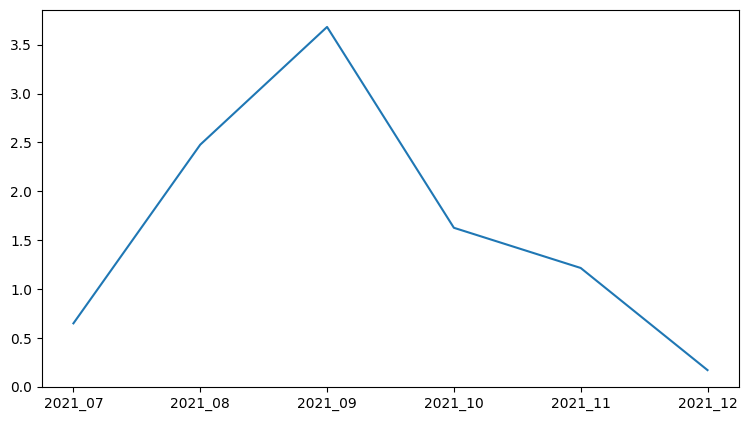

In [80]:
plt.plot(Datos_Contratos_inteligentes['Fecha'],Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000);


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


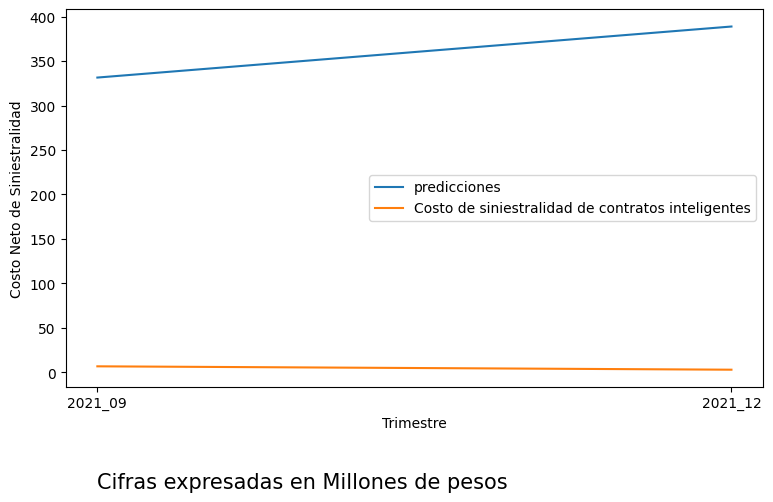

In [104]:

plt.plot(Datos_GM_BBVA_2['FECHA'][19:21],predicciones_sarimax2.values[:-1], label= 'predicciones');

plt.plot([sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[:3]),
          sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[-3:])],
        label = ('Costo de siniestralidad de contratos inteligentes'));
plt.legend();

plt.text(0, -130, 'Cifras expresadas en Millones de pesos', fontsize = 15) 
plt.xlabel('Trimestre')
plt.ylabel('Costo Neto de Siniestralidad');

<AxesSubplot:>

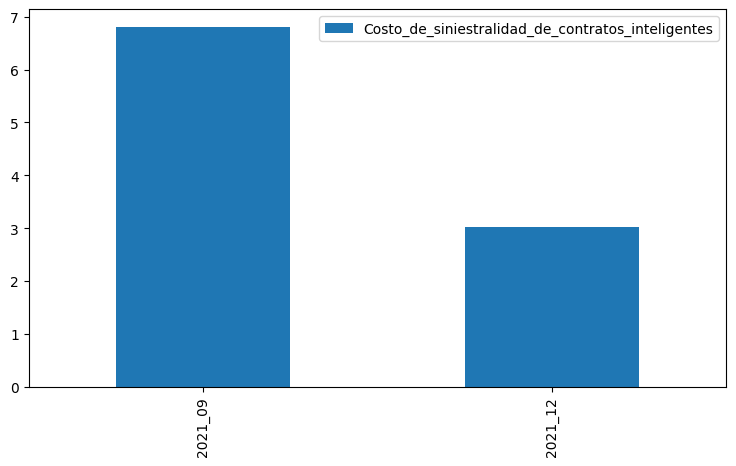

In [150]:
inf_dt = pd.DataFrame({'Predicciones': [predicciones_sarimax2.values[:-2],predicciones_sarimax2.values[-2:-1]],
                       'Costo_de_siniestralidad_de_contratos_inteligentes': [sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[:3]) ,sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[-3:])]},
                     index = ['2021_09','2021_12'])

inf_dt.plot(kind = 'bar')

In [83]:
# Analizando de manera general el modelo, la diferencia entre lo predicho por el modelo SARIMA generado
# y los datos obtenidos del ejercicio, asi como la diferencia y aportación por poarte del producto 
# que uslitza contratos inteligentes como formador de emision de polizas del seguro de gastos medicos 
porcentaje = float( sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[:3])/Datos_GM_BBVA_2['COSTO NETO DE SINIESTRALIDAD'][19:20])
print('El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_09 fue de {:.5%}'.format(porcentaje))

# El porcentaje puede considerarse representtativo ya que el costo de siniestralidad de un solo producto emitido por contratos 
# inteligentes durante 1 trismestre es del mas del 1% 

porcentaje = float( sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[-3:])/Datos_GM_BBVA_2['COSTO NETO DE SINIESTRALIDAD'][20:21])
print('El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_12 fue de {:.5%}'.format(porcentaje))

#Es super importante el cambio que se ejecuta en el costo de siniestralidad por parte de los contratos inteligentes
# ya que para el siguiente trimestre, el costo de siniestralidad, cae casi un 1 % mienstras que de manera general
# el costo de siniestralidad continua con una tendencia alcista, por eso y podemos explicar la caida tan drastica 
# en terminos de participación del porcentaje de siniestralidad

#mientras que el cosot de siniestralidad solo de las polizas provenientes de contratos intelinteges cayo un un mas del 55%
sin_seg_tr = float( sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[-3:]))
sin_pri_tr = float( sum((Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes']/1000000)[:3]))

    
porcentaje =(sin_seg_tr - sin_pri_tr)/sin_pri_tr
print('Caida porcential de los costos de siniestralidad de polizas provenientes de contratos inteligentes {:.5%}'.format(porcentaje))


#Ya que se analizo el porcentaje de participación del seguro de contratos inteligentes, repecto a su costo de siniestralidad
#Se hara uzo del indice de siniestralidad para tener un mejor panorama por el volumen de prima emitida

El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_09 fue de 1.35981%
El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_12 fue de 0.49254%
Caida porcential de los costos de siniestralidad de polizas provenientes de contratos inteligentes -55.75530%


### analisis del indice de siniestralidad

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


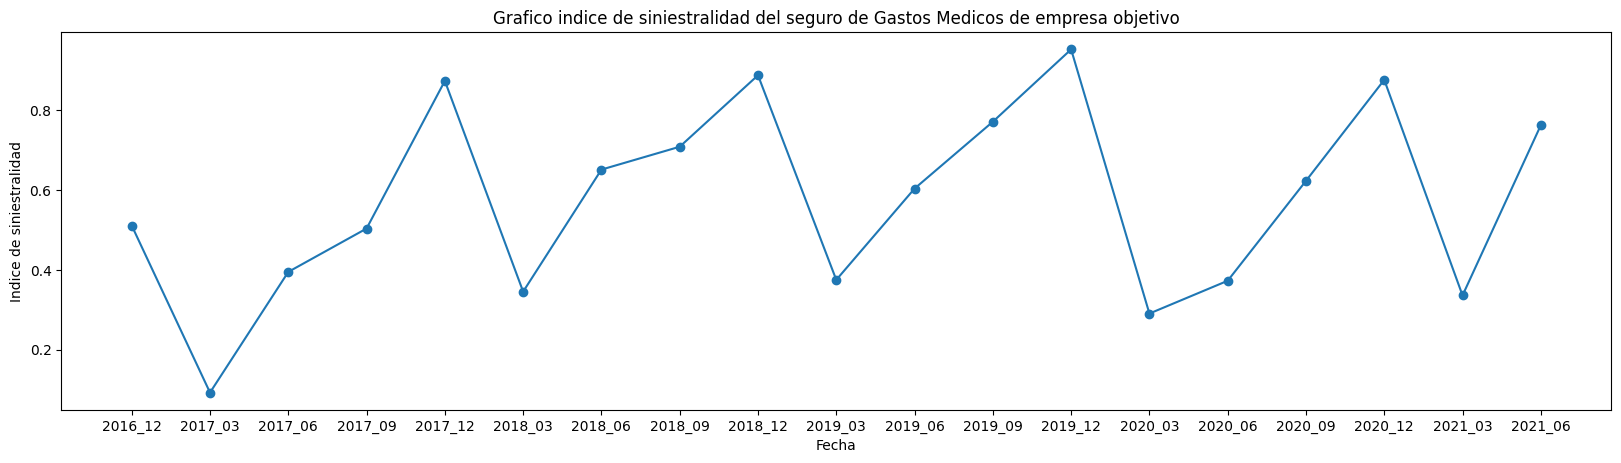

In [84]:
Datos_GM_BBVA_Indice =Datos_GM_BBVA_S.copy()
Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'] = (Datos_GM_BBVA_Indice['COSTO NETO DE SINIESTRALIDAD'] * 1000000) /Datos_GM_BBVA_Indice['PRIMA DIRECTA'] 


Fechas = ['2016_12','2017_03','2017_06','2017_09','2017_12','2018_03','2018_06','2018_09','2018_12','2019_03','2019_06',
          '2019_09','2019_12','2020_03','2020_06','2020_09','2020_12','2021_03','2021_06']

plt_1 = plt.figure(figsize=(20, 5)) 
plt.plot(Fechas, Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'],'o-')
plt.xlabel('Fecha')
plt.ylabel('Indice de siniestralidad')
plt.title('Grafico indice de siniestralidad del seguro de Gastos Medicos de empresa objetivo');
plt.show()

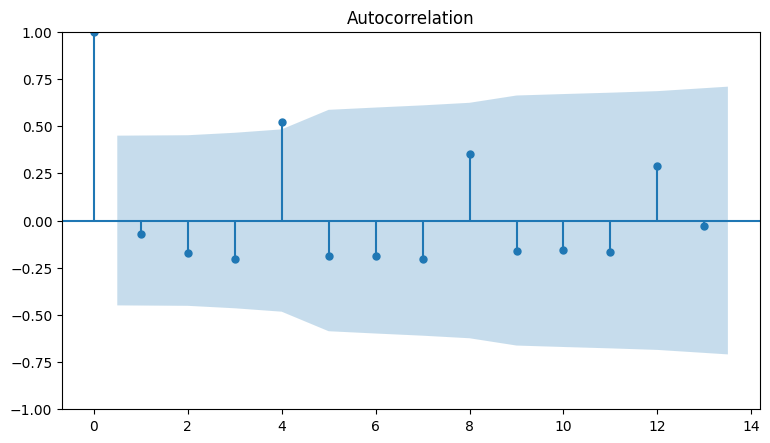

In [85]:
plot_acf(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], alpha= 0.05);
# Notamos la presencia de picos con autocorrelacion positiva cada tres lags nevativos

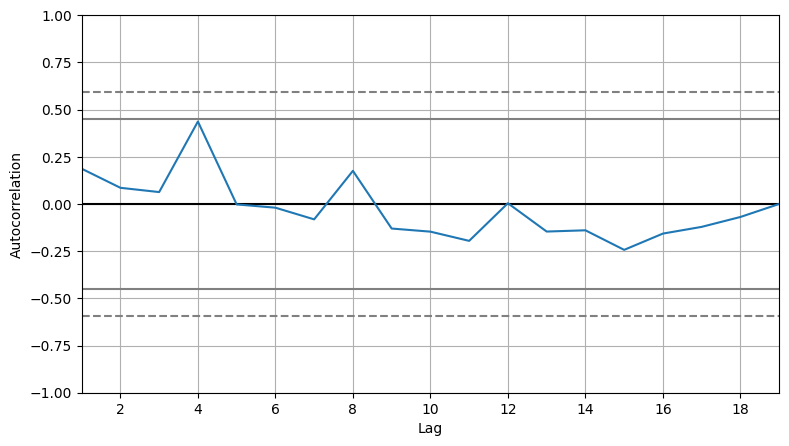

In [86]:
# Grafica de la autocorrelación uniendo puntos
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
autocorrelation_plot(Datos_GM_BBVA_S['COSTO NETO DE SINIESTRALIDAD'].tolist());

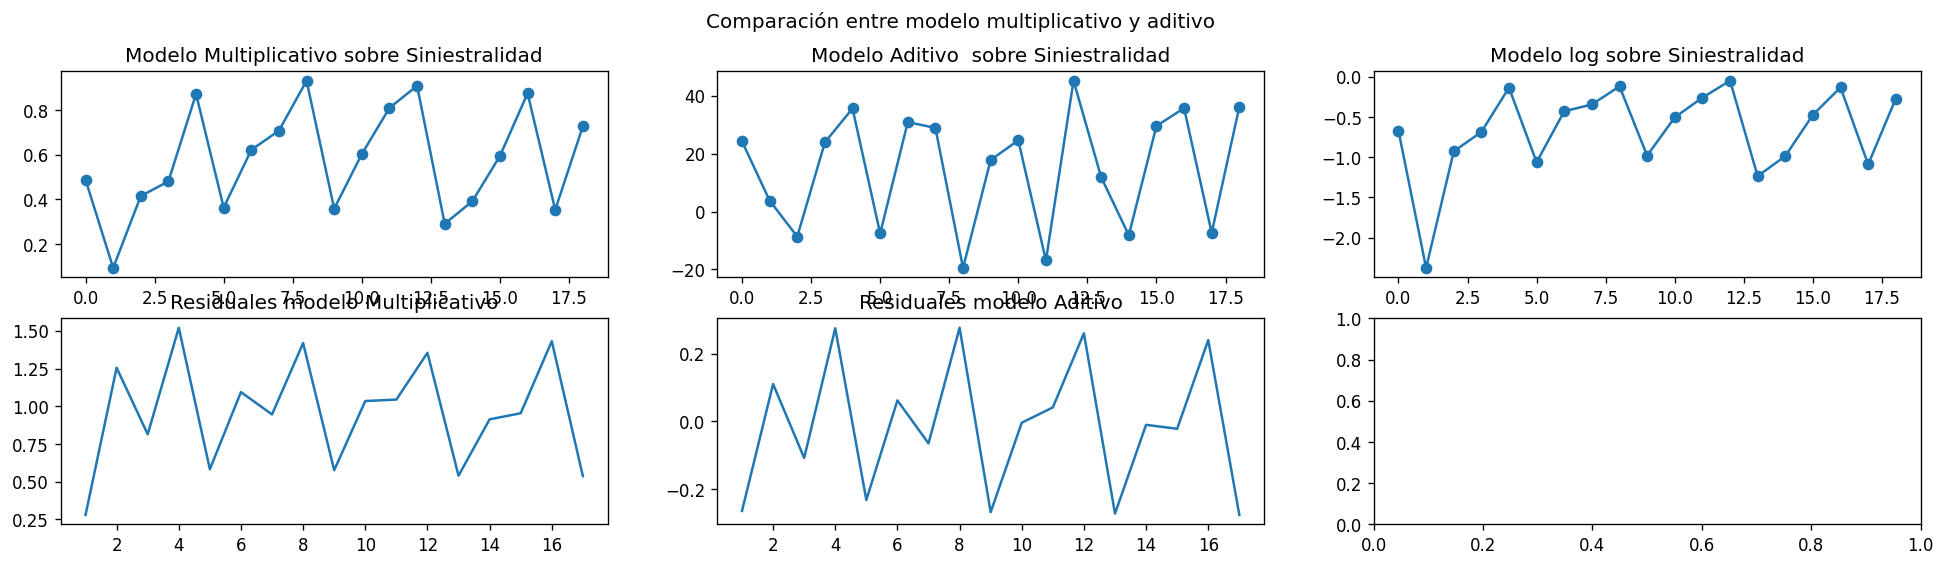

In [87]:
# Desestacionalidad multplicativa
fact_seasonal_M_in = seasonal_decompose(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], model='multiplicative', period= 3)
Datos_Desestacionalizados_M_in = Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'] / fact_seasonal_M_in.seasonal

# Desestacionalidad aditiva
fact_seasonal_A_in = seasonal_decompose(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], model='additive', period= 3)
Datos_Desestacionalizados_A_in = Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'] / fact_seasonal_A_in.seasonal

Datos_Desestacionalizados_log_in = np.log(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'])

fig, ax = plt.subplots(2, 3, figsize=(20,5), dpi=120)
fig.suptitle('Comparación entre modelo multiplicativo y aditivo')
ax[0,0].plot( Datos_Desestacionalizados_M_in,'o-')
ax[0,0].set_title('Modelo Multiplicativo sobre Siniestralidad')
ax[0,1].plot(Datos_Desestacionalizados_A_in, 'o-')
ax[0,1].set_title('Modelo Aditivo  sobre Siniestralidad');
ax[0,2].plot(Datos_Desestacionalizados_log_in,'o-')
ax[0,2].set_title('Modelo log sobre Siniestralidad')
ax[1,0].plot(fact_seasonal_M_in.resid)
ax[1,0].set_title('Residuales modelo Multiplicativo')
ax[1,1].plot(fact_seasonal_A_in.resid)
ax[1,1].set_title('Residuales modelo Aditivo');

#Se trabajara solo sobre el modelo log ya que el comportamiento de los residuales entre la descioposición de ambos 
# tipos de modelos, son casi identicos, y en ambos casos, se ven estacionales 

In [88]:
# Realizando la prueba adfuller para ambos cojuntos de informacion "desestacionalizados"
Prueba_Afuller_GM_Des_A = adfuller(Datos_Desestacionalizados_log_in.dropna())
print('Prueba Adfuller con los datos aditivos')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_A[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_A[1]))

#Rechaza prueba de estacionalidad, ya que pvalue es mayor al .05

Prueba Adfuller con los datos aditivos
El valor ADF: -2.1749272945601414
El valor P-value: 0.2154709066480156


Prueba Adfuller diferenciados con los datos log
El valor ADF: -2.9242687815470747
El valor P-value: 0.04259777943732492


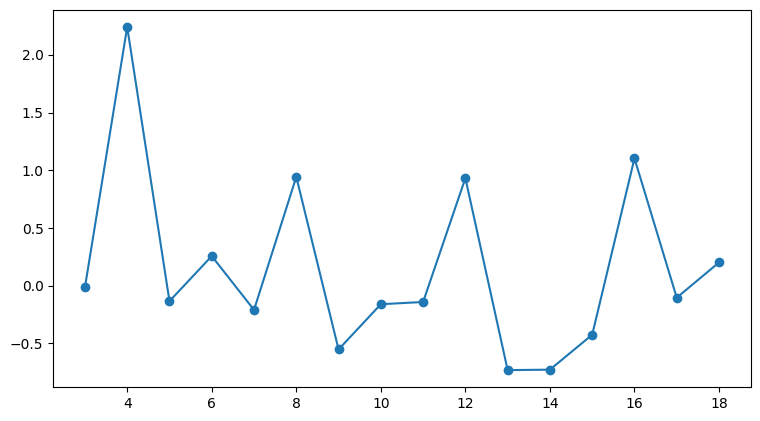

In [89]:
# Primera diferenciacion de drenciacion

#Diferenciacion al grado de la estacionalidad m =3 
Datos_Desestacionalizados_log_in_dif1 = pd.DataFrame(Datos_Desestacionalizados_log_in).diff(3)
Prueba_Afuller_GM_Des_log = adfuller(Datos_Desestacionalizados_log_in_dif1.dropna())
print('Prueba Adfuller diferenciados con los datos log')
print('El valor ADF: ' + str(Prueba_Afuller_GM_Des_log[0]))
print('El valor P-value: ' + str(Prueba_Afuller_GM_Des_log[1]))

plt.plot(Datos_Desestacionalizados_log_in_dif1.dropna(),'o-');

#Se acepta la primera diferenciación p-value menor a 0.05
# no se realiza otra diferenciación para no diferenciar los datos de mas  y perder información

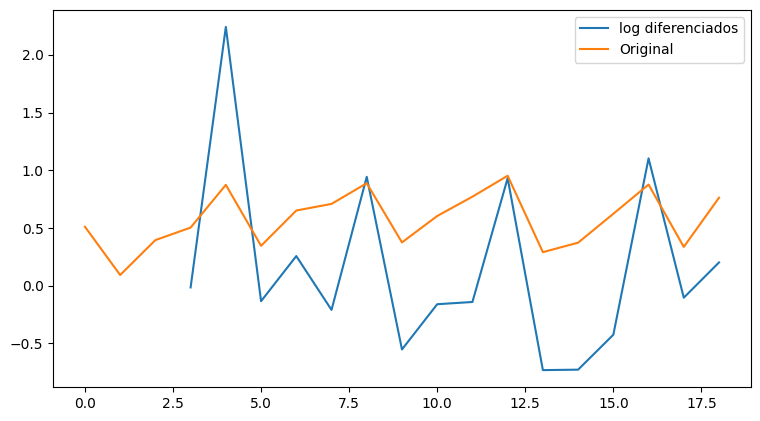

In [90]:
# Solo analizaremos como se ven nuestra graficas destacionalizada y diferenciada con forme a los datos originales
plt.plot(Datos_Desestacionalizados_log_in_dif1, label= 'log diferenciados');
plt.plot(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], label= 'Original')
plt.legend()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


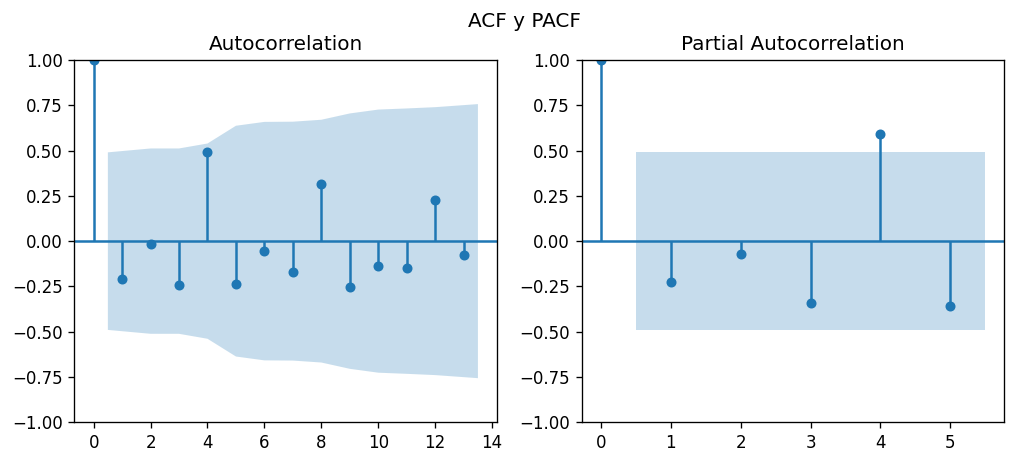

In [91]:
# Analizando el modelo con una desestacionalización log
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,4), dpi=120)
fig.suptitle('ACF y PACF')
plot_acf(Datos_Desestacionalizados_log_in_dif1.dropna(), ax= ax1);
plot_pacf(Datos_Desestacionalizados_log_in_dif1.dropna(), lags= 5, ax = ax2);

In [92]:
#Aplicacion de un modelo arma para su analisis

modelo_arima_in = ARIMA(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], order=(4,1,0))
modelo_arima_in_ajustado = modelo_arima_in.fit()
modelo_arima_in_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     INDICE DE SINIESTRALIDAD   No. Observations:                   19
Model:                       ARIMA(4, 1, 0)   Log Likelihood                   7.918
Date:                      Sun, 20 Nov 2022   AIC                             -5.836
Time:                              22:11:58   BIC                             -1.384
Sample:                                   0   HQIC                            -5.222
                                       - 19                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1865      0.252     -0.741      0.459      -0.680       0.307
ar.L2         -0.1328      0.250     -0.531      0.595      -0.623       0.357
ar.L3         -0.1173      0.331     -0.354      0.723      -0.767       0.532
ar.L4          0.7881      0.318      2.478      0.013       0.165       1.412
sigma2         0.0172      0.009      1.870      0.061      -0.001       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.54   Prob(JB):                         0.79
Heteroskedasticity (H):               2.12   Skew:                             0.40
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


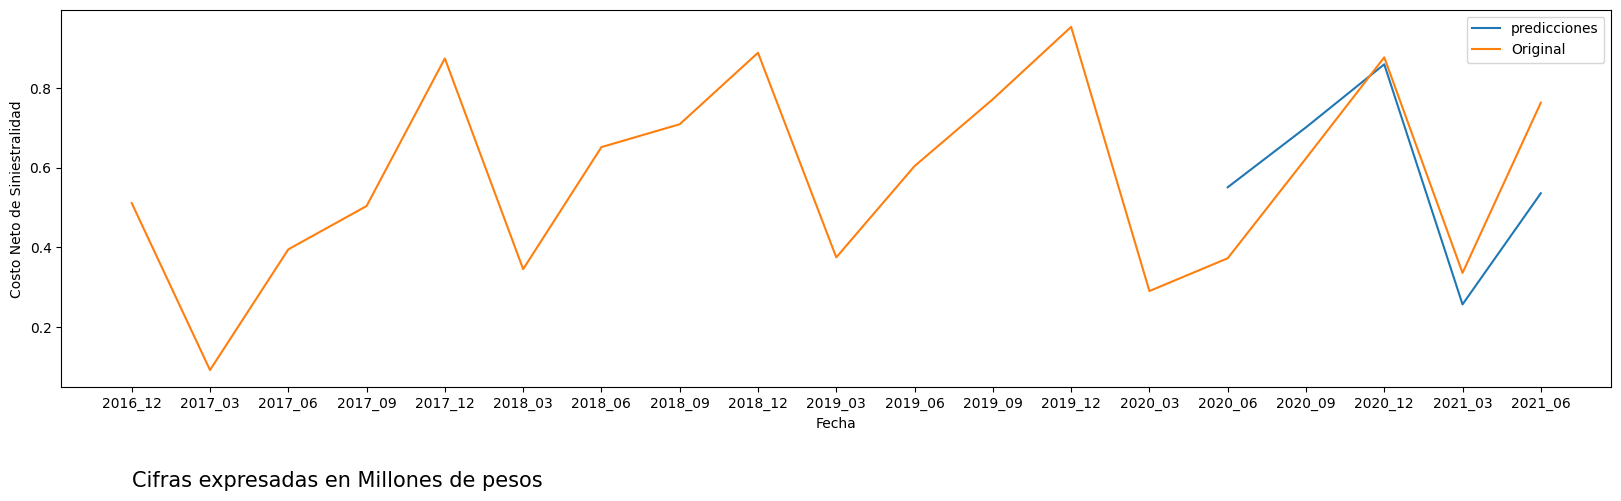

((array([-1.80134827, -1.36019854, -1.08697871, -0.87729702, -0.70051708,
         -0.54335769, -0.39863433, -0.26184392, -0.12980477,  0.        ,
          0.12980477,  0.26184392,  0.39863433,  0.54335769,  0.70051708,
          0.87729702,  1.08697871,  1.36019854,  1.80134827]),
  array([-174.24673124, -160.21349722, -109.85750234,  -75.60750178,
          -67.45905033,  -62.1912293 ,    0.91934248,    9.05788733,
           11.96354766,   56.98145851,   68.48276572,   77.1       ,
           77.64459091,   78.31257295,   94.69345182,   96.36241398,
          108.41584806,  116.44521033,  161.40476034])),
 (99.96567735212797, 16.221491466963236, 0.9656100993637152))

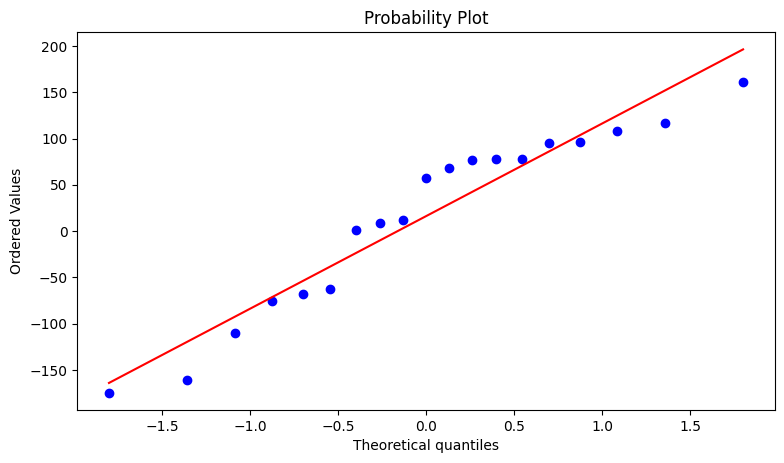

In [93]:
# la parte del proceso arima se ve bastante bien por los p value arrojados por los paramentros utilizados
# observacion grafica del modelo arima como predictor
predicciones_arima_in =modelo_arima_in_ajustado.predict(start=14,end=18,dynamic=True)
plt_1 = plt.figure(figsize=(20, 5))
plt.plot(predicciones_arima_in, label= 'predicciones');
plt.plot(Fechas,Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], label= 'Original')
plt.legend()

plt.text(0, -.2, 'Cifras expresadas en Millones de pesos', fontsize = 15);
plt.xlabel('Fecha');
plt.ylabel('Costo Neto de Siniestralidad');
plt.show()

#Analisis de residuales por grafica qqplot
stats.probplot(modelo_arima_ajustado.resid, dist="norm", plot=pylab)

# Se observa que las prediciones son buenas,sin embargo, solo se cuenta con el factor estacioanrio arima

In [94]:
# Analizando un modelo SARIMAX
lista_resultados = []
for P in [0,1,2,4]:
    for Q in [0,1,2,4]:
        try:
            modelo = SARIMAX(Datos_Desestacionalizados_log_in_dif1.dropna(), order=(4,1,0),seasonal_order=(P,1,Q,3),).fit(disp=-1)
        except:
            continue
        print()
        lista_resultados.append([(P,Q),modelo.aic])
Resultados_AIC = pd.DataFrame(lista_resultados)
Resultados_AIC.columns = ['Factores (P,Q)', 'AIC']
Resultados_AIC[Resultados_AIC['AIC'] == min(Resultados_AIC['AIC'])]

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\ts

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"Factores (P,Q)",AIC
0,"(0, 0)",40.227247


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


((array([-1.80134827, -1.36019854, -1.08697871, -0.87729702, -0.70051708,
         -0.54335769, -0.39863433, -0.26184392, -0.12980477,  0.        ,
          0.12980477,  0.26184392,  0.39863433,  0.54335769,  0.70051708,
          0.87729702,  1.08697871,  1.36019854,  1.80134827]),
  array([-0.41826979, -0.34890033, -0.29587918, -0.24993911, -0.14697631,
         -0.13212765, -0.10776309, -0.10445219, -0.08281067, -0.06483165,
          0.00236367,  0.07103563,  0.1715634 ,  0.17434757,  0.27137586,
          0.30226673,  0.31852777,  0.51117152,  0.78805674])),
 (0.31716422057578003, 0.03467152148131537, 0.9747391870798761))

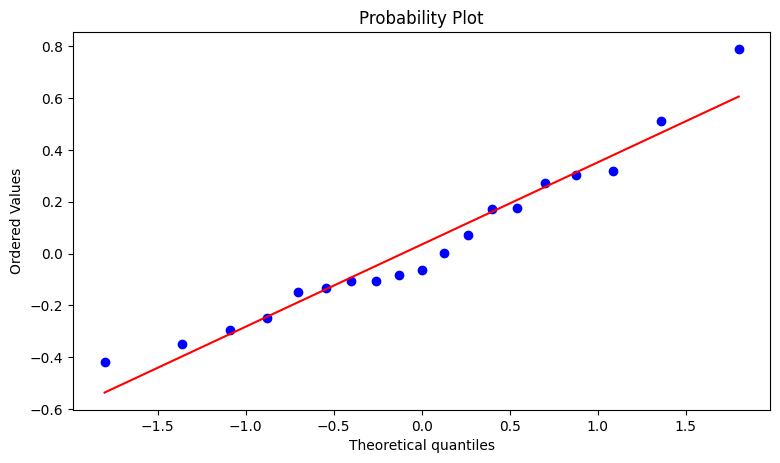

In [95]:
modelo_sarimax_in= sm.tsa.statespace.SARIMAX(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'],order=(4,1,0),seasonal_order=(0,1,0,3))
modelo_sarimax_in_ajustado=modelo_sarimax_in.fit()
stats.probplot(modelo_sarimax_in_ajustado.resid.dropna(), dist="norm", plot=pylab)

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


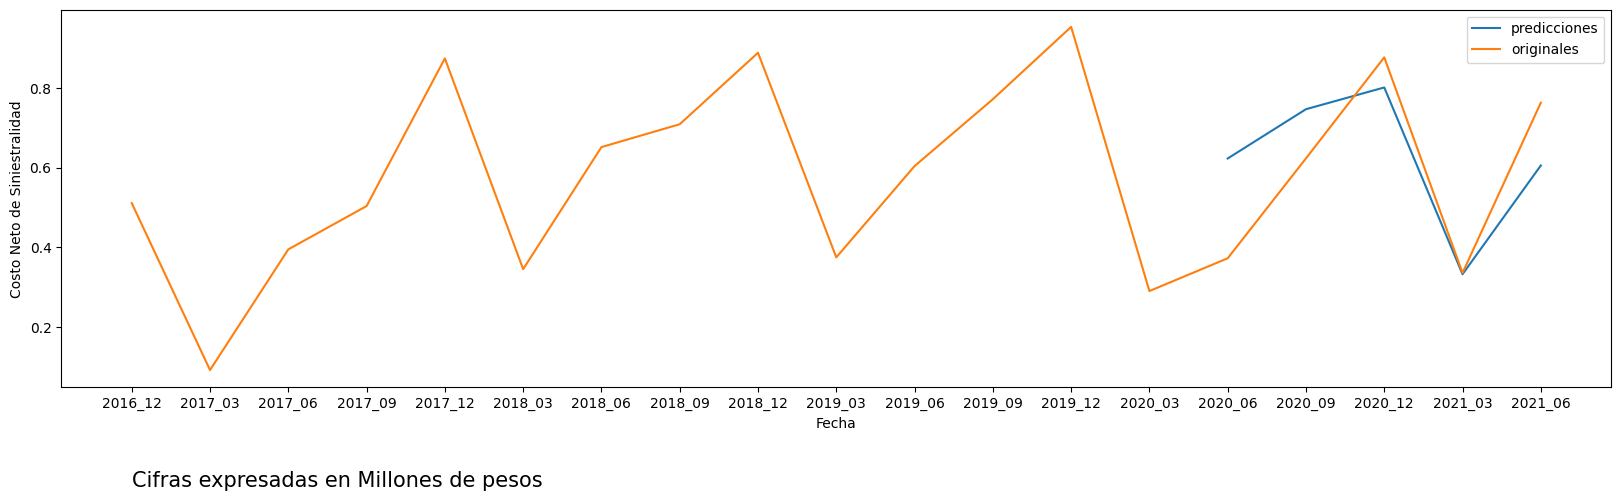

In [96]:
predicciones_sarimax_in =modelo_sarimax_in_ajustado.predict(start=14,end=18,dynamic=True)
plt_1 = plt.figure(figsize=(20, 5))
plt.plot(predicciones_sarimax_in, label= 'predicciones');
plt.plot(Fechas,Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'], label= 'originales');
plt.legend();

plt.text(0, -.2, 'Cifras expresadas en Millones de pesos', fontsize = 15);
plt.xlabel('Fecha');
plt.ylabel('Costo Neto de Siniestralidad');
#Observamos que el modelo se ajusta mejor para los datos, sin embargo seria buena opcion buscar alguna alternativa en loop
# para encontrar un mdelo que no solo de el AIC mas bajo, tambien el MSE

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


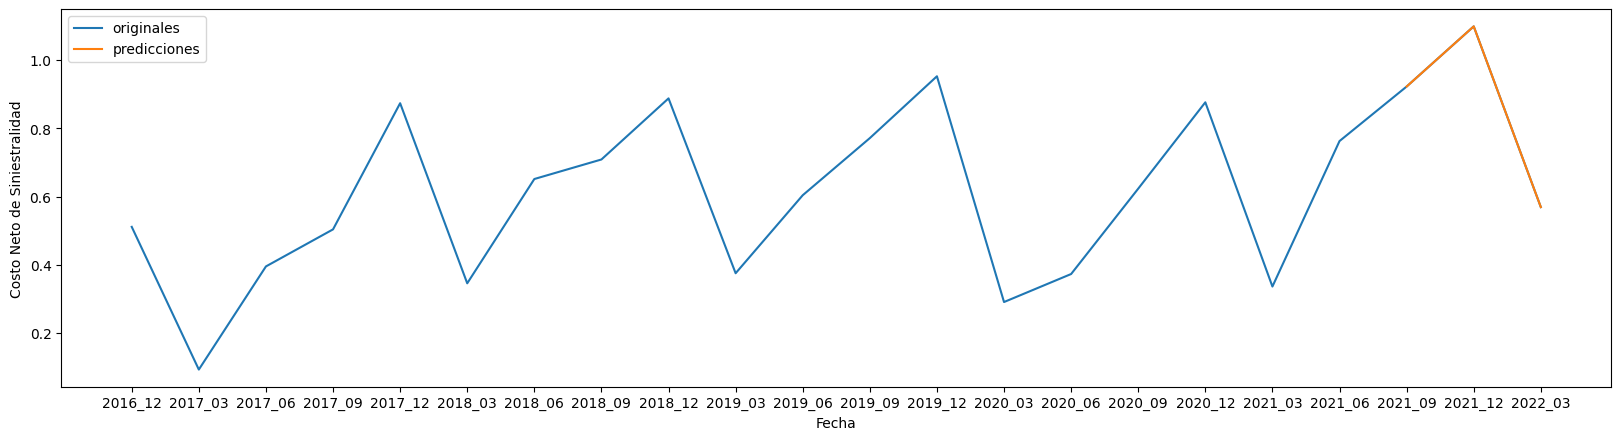

In [97]:
## por analisis de MSE y residuales, se observa que es mejor el uso de un modelo arima para el tratado de datos

# ya que el volumen de datos es escaso, no podemos pronosticar mas alla de 1 año
# pronostico a un año 
# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
Datos_Adicionales_in_Prediccion = pd.DataFrame()
Datos_Adicionales_in_Prediccion['Fechas'] = Fechas + ['2021_09','2021_12','2022_03']
Datos_Adicionales_in_Prediccion['INDICE DE SINIESTRALIDAD'] = (list(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD']) + ['NaN', 'NaN','NaN'])

predicciones_arima2_in =modelo_arima_in_ajustado.predict(start=19,end=21,dynamic=True)
plt_1 = plt.figure(figsize=(20, 5))
plt.plot(Datos_Adicionales_Prediccion['Fechas'],list(Datos_GM_BBVA_Indice['INDICE DE SINIESTRALIDAD'].values) + list(predicciones_arima2_in.values), label= 'originales');
plt.plot(predicciones_arima2_in, label= 'predicciones');
plt.legend();

plt.xlabel('Fecha')
plt.ylabel('Costo Neto de Siniestralidad');
#Observamos que el modelo se ajusta mejor para los datos, sin embargo seria buena opcion buscar alguna alternativa en loop
# para encontrar un mdelo que no solo de el AIC mas bajo, tambien el MSE

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


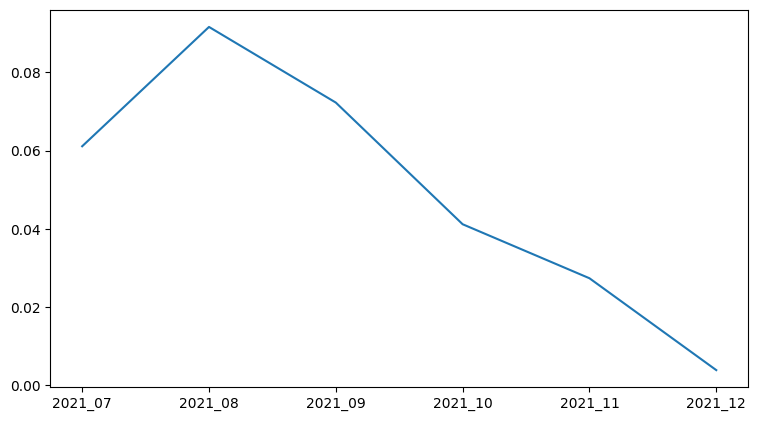

In [98]:
# datos del indice de siniestralidad de contratos inteligentes
Datos_Contratos_inteligentes['Indice siniestralidad contratos inteligentes'] = Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes'] / Datos_Contratos_inteligentes['Prima Emitida contratos inteligentes']
Datos_Contratos_inteligentes['Indice siniestralidad contratos inteligentes']
# desarollo de los indices de siniestralidad por mes
plt.plot(Datos_Contratos_inteligentes['Fecha'],Datos_Contratos_inteligentes['Indice siniestralidad contratos inteligentes']);

In [99]:
#obtención del indice de siniestralidad por trimestre
indices_Contratos = [sum(Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes'][:3])/sum(Datos_Contratos_inteligentes['Prima Emitida contratos inteligentes'][:3]),
                    sum(Datos_Contratos_inteligentes['Costo Siniestralidad contratos inteligentes'][-3:])/sum(Datos_Contratos_inteligentes['Prima Emitida contratos inteligentes'][-3:])]

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


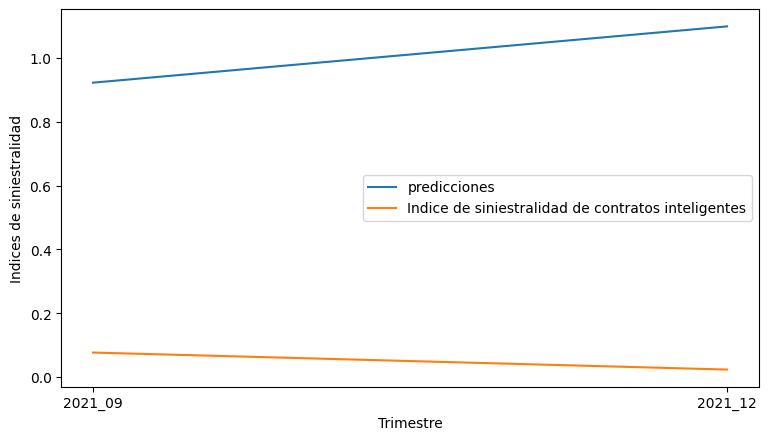

In [100]:

plt.plot(['2021_09','2021_12'],predicciones_arima2_in.values[:-1], label= 'predicciones');
plt.plot(indices_Contratos,label = ('Indice de siniestralidad de contratos inteligentes'));
plt.legend();

plt.xlabel('Trimestre')
plt.ylabel('Indices de siniestralidad');

In [101]:
# Analizando de manera general el modelo, la diferencia entre lo predicho por el modelo SARIMA generado
# y los datos obtenidos del ejercicio, asi como la diferencia y aportación por poarte del producto 
# que uslitza contratos inteligentes como formador de emision de polizas del seguro de gastos medicos 
porcentaje = float(indices_Contratos[0])/(predicciones_arima2_in.values)[0]
print('El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_09 fue de {:.5%}'.format(porcentaje))

# El porcentaje puede considerarse representtativo ya que el indice de siniestralidad de un solo producto emitido por contratos 
# inteligentes durante 1 trismestre es del mas del 8% 

porcentaje = float( indices_Contratos[1])/(predicciones_arima2_in.values)[1]
print('El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_12 fue de {:.5%}'.format(porcentaje))

#Es super importante el cambio que se ejecuta en el costo de siniestralidad por parte de los contratos inteligentes
# ya que para el siguiente trimestre, el costo de siniestralidad, cae casi mas del 6 % mienstras que de manera general
# el costo de siniestralidad continua con una tendencia alcista, por eso y podemos explicar la caida tan drastica 
# en terminos de participación del porcentaje de siniestralidad

#mientras que el cosot de siniestralidad solo de las polizas provenientes de contratos intelinteges cayo casi el 70%
    
porcentaje =(indices_Contratos[1] - indices_Contratos[0])/indices_Contratos[0]
print('Caida porcential de los costos de siniestralidad de polizas provenientes de contratos inteligentes {:.5%}'.format(porcentaje))



El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_09 fue de 8.33287%
El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_12 fue de 2.14527%
Caida porcential de los costos de siniestralidad de polizas provenientes de contratos inteligentes -69.33286%


In [102]:
El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_09 fue de 8.33287%
El porcentaje de participación del la emision del seguro de gastos medicos durante 2021_12 fue de 2.14527%
Caida porcential de los costos de siniestralidad de polizas provenientes de contratos inteligentes -69.33286%

SyntaxError: invalid syntax (2550094002.py, line 1)